<a href="https://colab.research.google.com/github/Shahanashirin-k/CREDIT_CARD-FRAUD_DETECTION/blob/main/CCFD_vr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD TRANSACTION


# Load the data

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all the required library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
df_C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/creditcard.csv')

In [ ]:
df_C.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# PRE-PROCESSING

### **EDA**

In [ ]:
df_C.shape

(284807, 31)

In [ ]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df_C.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df_C.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**It means that it doesn't have missing values**

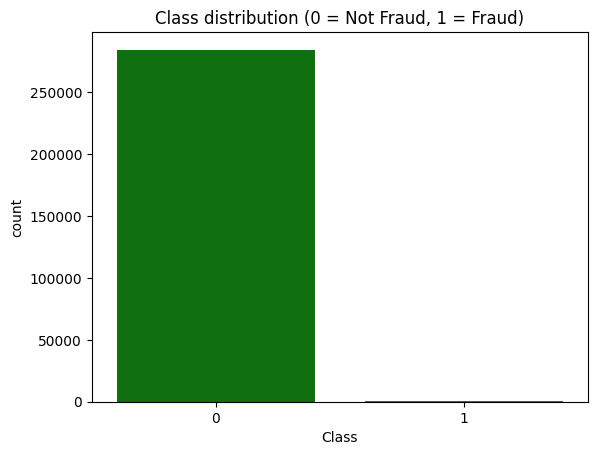

In [ ]:
sns.countplot(x='Class', data=df_C, palette={'0': 'green', '1': 'red'})
plt.title('Class distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()

In [ ]:
# Percentage of fraud cases'
fraud_percentage = df_C['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [ ]:
#Seperating Actual and fraud data based on Class analysis
Actual= df_C[df_C.Class==0]
Actual.shape

(284315, 31)

In [ ]:
Fraud= df_C[df_C.Class==1]
Fraud.shape

(492, 31)

seperating the data based on the Amount

In [ ]:
#Seperating the data based on the amount wise analysis
Actual.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
Fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


*   Fraudulent transactions tend to have a higher average transaction amount compared to non-fraudulent ones (122.2 vs 88.29).
*   While the maximum amount in fraudulent transactions is significantly lower than in non-fraudulent transactions, fraudulent transactions still show a higher mean and third quartile (75%) compared to non-fraudulent ones.


# FEATURE ENGINEERING

Based on Time

In [ ]:
print(df_C['Time'].head(10))
print(df_C['Time'].describe())

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


creating Hour colomn from the time in second

In [ ]:
df_C['Hour'] = pd.to_datetime(df_C['Time'], unit='s').dt.hour

<Axes: title={'center': 'Fraudulent Transactions by Hour'}, xlabel='Hour'>

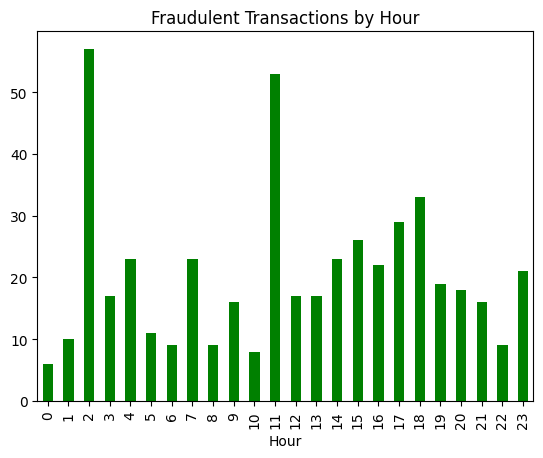

In [ ]:
hourly_fraud_analysis = df_C[df_C['Class'] == 1].groupby('Hour').size()
hourly_fraud_analysis.plot(kind='bar', title='Fraudulent Transactions by Hour', color= 'green')

**Visualisation of Time VS Hour**

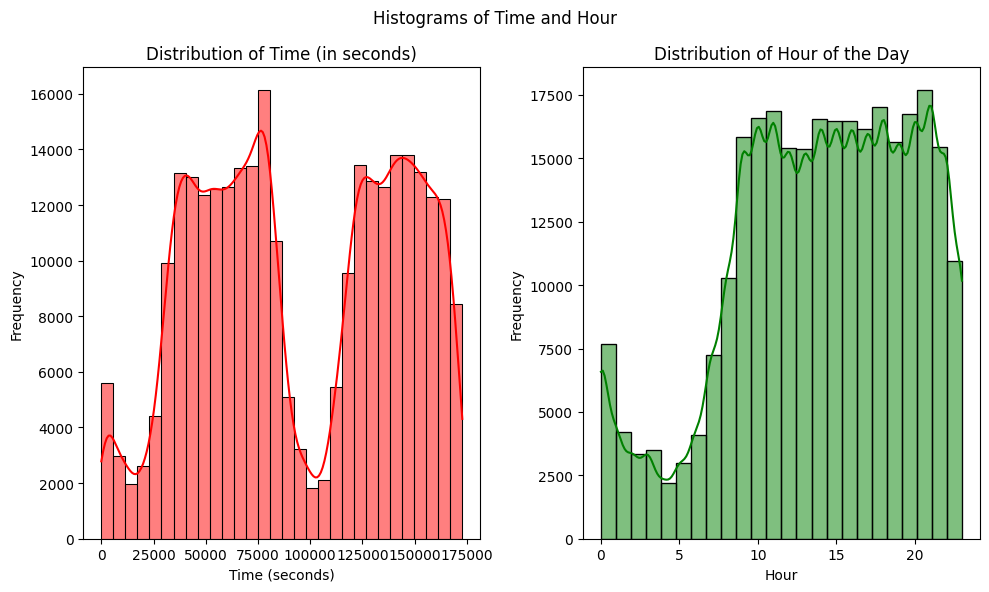

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_C is your DataFrame with 'Time' and 'Hour' columns
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

# Plot the 'Time' column (in seconds)
sns.histplot(df_C['Time'], bins=30, ax=ax[0], kde=True, color= 'red')
ax[0].set_title('Distribution of Time (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Frequency')

# Plot the 'Hour' column (hour of the day)
sns.histplot(df_C['Hour'], bins=24, ax=ax[1], kde=True, color= 'green')
ax[1].set_title('Distribution of Hour of the Day')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Frequency')

# Add a super title for the entire figure
plt.suptitle("Histograms of Time and Hour")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


From this graphs, the hour graph is easier to understand, and it clearly shows patterns such as higher transactions are happen during working hours and at night.

Based on Amount

In [ ]:
amount_skewness = df_C['Amount'].skew()
time_skewness = df_C['Time'].skew()
hour_skewness = df_C['Hour'].skew()

print(f'Skewness of Amount: {amount_skewness}')
print(f'Skewness of Time: {time_skewness}')
print(f'Skewness of hour: {hour_skewness}')

Skewness of Amount: 16.977724453761024
Skewness of Time: -0.0355676180063216
Skewness of hour: -0.4904701602042523


Amount: The data is highly skewed to the right (positive skew), with a few large values making the distribution asymmetrical.

Time: The data is nearly symmetrical, with no significant skew in either direction.

**Log Transformation for the right skewed data**

In [ ]:
df_C['Log_Amount'] = np.log1p(df_C['Amount'])

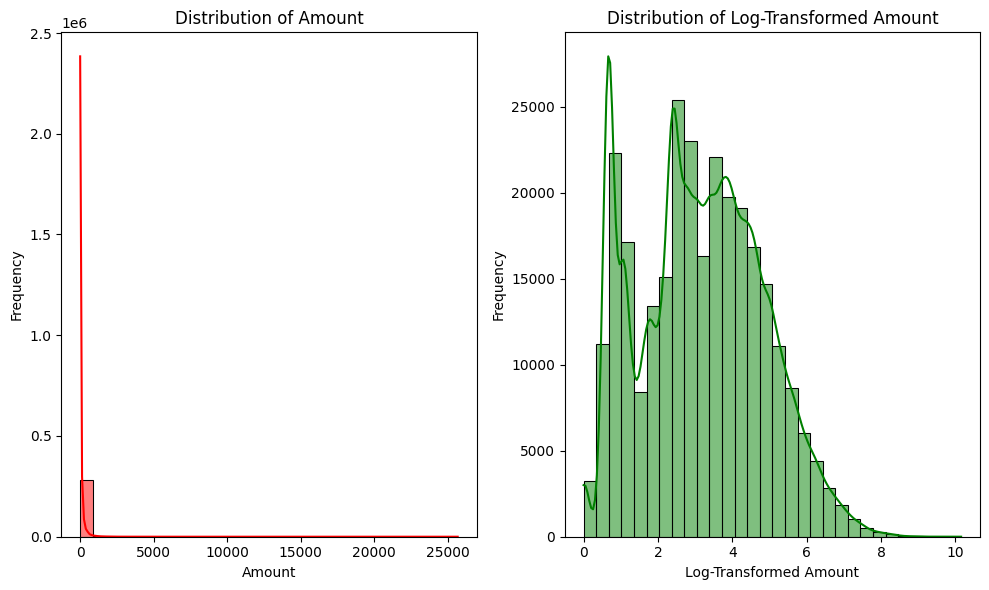

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Histogram for Amount
plt.subplot(1, 2, 1)
sns.histplot(df_C['Amount'], bins=30, kde=True, color= 'red')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram for Time
plt.subplot(1, 2, 2)
sns.histplot(df_C['Log_Amount'], bins=30, kde=True, color= 'green')
plt.title('Distribution of Log-Transformed Amount')
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Distribution of Amount:**         The Amount distribution is highly skewed, with the majority of transaction amounts clustered near zero and a few extremely large values causing a long tail.

**Distribution of Log-Transformed Amount:**
The log-transformed distribution is more normalized.


In [ ]:
# Categorize amount into bins
df_C['Amount_Category'] = pd.cut(df_C['Amount'], bins=[-1, 100, 1000, 10000, np.inf], labels=['Very Low', 'Low', 'Medium', 'High'])

In [ ]:
# Filter and print rows with Amount_Category of 'Medium' or 'High'
filtered_df = df_C[df_C['Amount_Category'].isin(['Medium', 'High'])]
print(filtered_df[['Amount', 'Amount_Category']])


          Amount Amount_Category
51       1402.95          Medium
89       1142.02          Medium
164      3828.04          Medium
633      1015.61          Medium
865      1602.99          Medium
...          ...             ...
283875   1026.46          Medium
284154   1088.04          Medium
284249  10199.44            High
284383   1114.00          Medium
284497   1484.66          Medium

[2940 rows x 2 columns]


In [ ]:
# Final DataFrame with engineered features
df_engineered = df_C.drop(['Time', 'Amount', 'Amount_Category'], axis=1)
df_engineered.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Log_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,4.262539


# Train and Test Split

In [ ]:
x = df_engineered.drop(columns= "Class", axis = 1)

In [ ]:
y = df_engineered.Class

In [ ]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Hour,Log_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [ ]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


**Splitting the data into Train data and Test data**

Splitting the data into 70% for training set and 30% of the data for test set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(x_test))

199364
85443
199364
85443


# Balencing the train data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE only on the training data
x_smote, y_smote = smote.fit_resample(x_train, y_train.values.ravel())

# Print the new shape of x_train and y_train after SMOTE
print("Training set after SMOTE(x) - Features shape:", x_smote.shape)
print("Training set after SMOTE(y) - Target shape:", y_smote.shape)

Training set after SMOTE(x) - Features shape: (398016, 30)
Training set after SMOTE(y) - Target shape: (398016,)


In [ ]:
# Check the class distribution
print(f"Before SMOTE - Class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"After SMOTE - Class distribution: {dict(zip(*np.unique(y_smote, return_counts=True)))}")

Before SMOTE - Class distribution: {0: 199008, 1: 356}
After SMOTE - Class distribution: {0: 199008, 1: 199008}


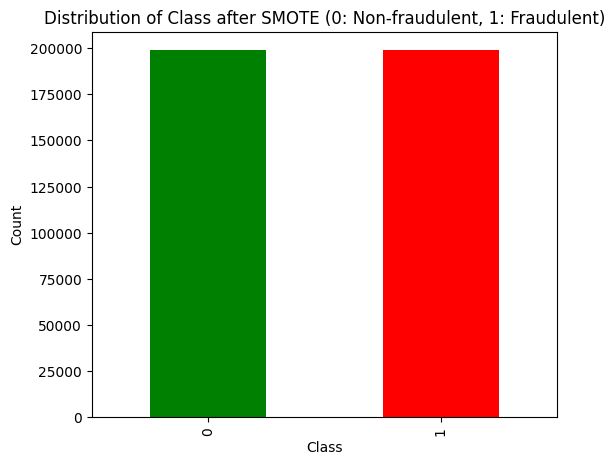

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_smote to a pandas Series
y_smote_series = pd.Series(y_smote)

# Visualize the distribution of 'Class' (target variable) after SMOTE
plt.figure(figsize=(6, 5))
y_smote_series.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Class after SMOTE (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) oversamples the minority class (fraudulent transactions, class 1) by generating synthetic samples. It does this by creating new instances along the lines connecting existing minority class instances, without altering the majority class instances. Thus, it brings both classes to the same size.

In [ ]:
# Print the shape of the training and testing data
print("Training set shape:", x_smote.shape, y_smote.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (398016, 30) (398016,)
Testing set shape: (85443, 30) (85443,)


In [ ]:
print(len(x_smote))
print(len(x_test))
print(len(y_smote))
print(len(x_test))

398016
85443
398016
85443


It means that SMOTE has balanced the dataset by oversampling the minority class (fraudulent transactions) in the training set to match the majority class count. Now both classes have an equal number of samples, summing to a total of 398042 samples in the training set.

 SMOTE is only applied to the training set to avoid data leakage, so the test set remains at its original 20% split of the full dataset.



*   Our training set is now balanced, which should help improve model performance by providing it with an equal number of fraudulent and authentic transactions during training.
*   The test set still has the original class imbalance.



# **MODEL SELECTION**

## USING TRADITIONAL ML MODELS

### **LR**

In [ ]:
# Standardize features for LR
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(x_test)

# Training the LR model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train_smote_scaled, y_smote)

# Predicting on test set
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1]))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

AUC-ROC: 0.9645892706549839


**Confusion Matrix**

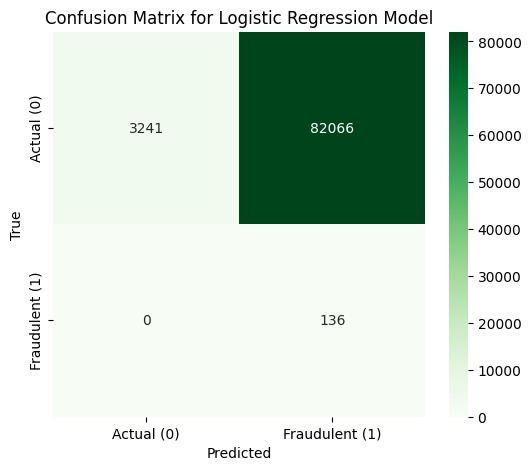

In [ ]:
cm_lr = confusion_matrix(y_test, lr_model.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Actual (0)', 'Fraudulent (1)'], yticklabels=['Actual (0)', 'Fraudulent (1)'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### **RF**

In [ ]:
# Train the RF model
rf_model = RandomForestClassifier(max_depth=30,  # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at a leaf node
    bootstrap=True,  # Use bootstrap sampling
    random_state=42)
rf_model.fit(x_smote, y_smote)


# Predict on test set
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: 0.9840378849677188


**CM**

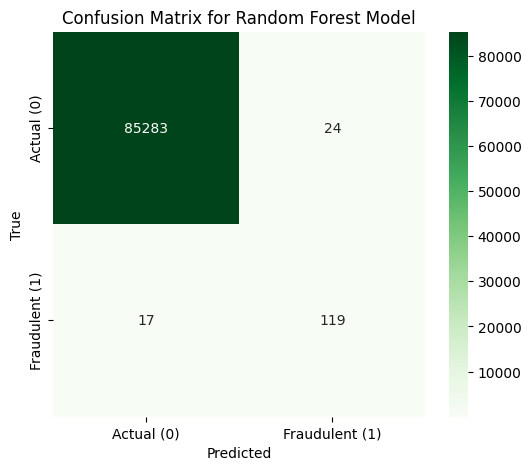

In [ ]:
cm_rf = confusion_matrix(y_test, rf_model.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Actual (0)', 'Fraudulent (1)'], yticklabels=['Actual (0)', 'Fraudulent (1)'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**XGBoost**

In [ ]:
# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_smote, y_smote)

# Predict on test set
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.76      0.87      0.81       136

    accuracy                           1.00     85443
   macro avg       0.88      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: 0.9904204985591831


**Confusion Matrix**

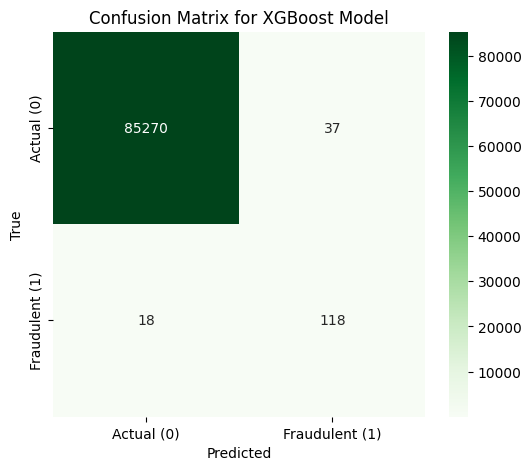

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_model.predict(x_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Actual (0)', 'Fraudulent (1)'], yticklabels=['Actual (0)', 'Fraudulent (1)'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The XGBoost model is performing quite well.
For the minority class (Class 1), the performance is also strong compared to LR, with Recall of 0.87.

## Anomaly Detection Methods

### IF

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the Isolation Forest
model_iF = IsolationForest(n_estimators=200, max_samples= 0.10, contamination=float(0.01), random_state=42, verbose=2)
# Predict anomalies
y_pred= model_iF.fit_predict(x)

# Map predictions: 1 (Normal) -> 0, -1 (Anomaly)
y_pred= [1 if x == -1 else 0 for x in y_pred]

print("Classification Report:")
print(classification_report(y, y_pred))
roc_auc = roc_auc_score(y, y_pred)
print("AUC-ROC Score:")
print(roc_auc)

Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

Confusion Matrix

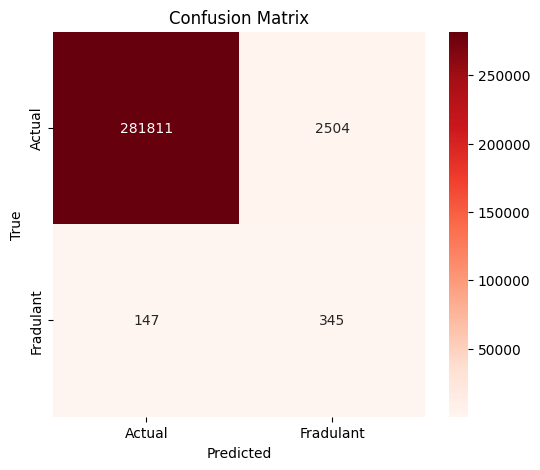

In [ ]:
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Actual', 'Fradulant'], yticklabels=['Actual', 'Fradulant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The Isolation Forest model performed well with an overall accuracy of 99%. It was particularly good at identifying non-fraudulent transactions. While it detected a significant portion of fraudulent transactions with a recall of 0.70, it wasn't perfect in catching all fraud cases. The model's AUC-ROC score of 0.8462 suggests it did a decent job distinguishing between fraudulent and non-fraudulent transactions.

### SVM

In [ ]:
from sklearn.svm import OneClassSVM

# Create the One-class SVM object
svm_one = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

# Fit the data and tag the outliers
y_pred_svm= svm_one.fit_predict(x)

# Get the predictions
y_pred_svm = [1 if x == -1 else 0 for x in y_pred_svm]

print("Classification Report:")
print(classification_report(y, y_pred_svm))
roc_auc = roc_auc_score(y, y_pred_svm)
print("AUC-ROC Score:")
print(roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.79      0.05       492

    accuracy                           0.95    284807
   macro avg       0.51      0.87      0.51    284807
weighted avg       1.00      0.95      0.97    284807

AUC-ROC Score:
0.8719829174357023


Confusion Matrix

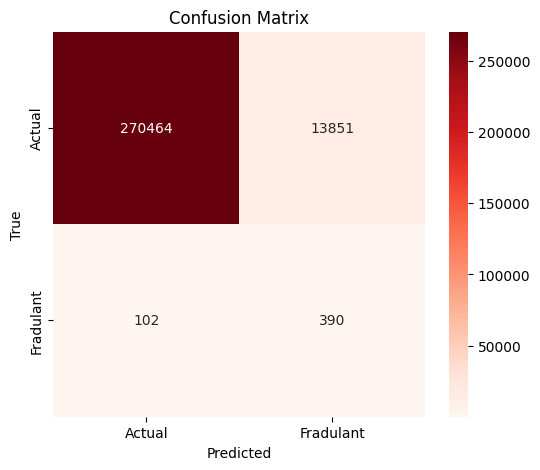

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y, y_pred_svm)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Actual', 'Fradulant'], yticklabels=['Actual', 'Fradulant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The One-Class SVM model successfully identified 79% of fraudulent transactions (high Recall), but it had a low Precision (0.03), meaning it incorrectly flagged many normal transactions as fraudulent. Despite this, it achieved the highest AUC-ROC score (0.87), showing good overall ability to distinguish between fraud and normal transactions. However, the low F1-Score indicates that the model needs adjustments to better balance Precision and Recall.

### Autoencoder

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import tensorflow as tf

# Define the autoencoder model
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    encoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(encoded)

    # Latent space
    latent = Dense(8, activation='relu')(encoded)

    # Decoder
    decoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(latent)
    decoded = Dropout(0.3)(decoded)
    decoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

In [ ]:
# Prepare the data
x_scaled = (x - x.min()) / (x.max() - x.min())  # Normalize the input features
input_dim = x_scaled.shape[1]

In [ ]:
# Build and compile the model
autoencoder = create_autoencoder(input_dim)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Train the model on normal transactions (non-fraudulent class, y == 0)
x_train = x_scaled[y == 0]
autoencoder.fit(x_train, x_train, epochs=60, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.1048 - val_loss: 0.0073
Epoch 2/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 3/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 4/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 5/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 6/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 7/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 8/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 9/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 10/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 11/60
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 12/60
3554/35

In [ ]:
# Calculate reconstruction error for all transactions
reconstructed = autoencoder.predict(x_scaled)
mse = np.mean(np.square(x_scaled - reconstructed), axis=1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


In [ ]:
# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Using the 95th percentile for threshold
predictions = np.where(mse > threshold, 1, 0)  # 1: anomaly (fraud), 0: normal

In [ ]:
# Evaluate the model
print(classification_report(y, predictions))
roc_auc = roc_auc_score(y, predictions)
print("ROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.02      0.67      0.04       492

    accuracy                           0.95    284807
   macro avg       0.51      0.81      0.51    284807
weighted avg       1.00      0.95      0.97    284807

ROC AUC Score: 0.8088657533604159


Confusion Matrix

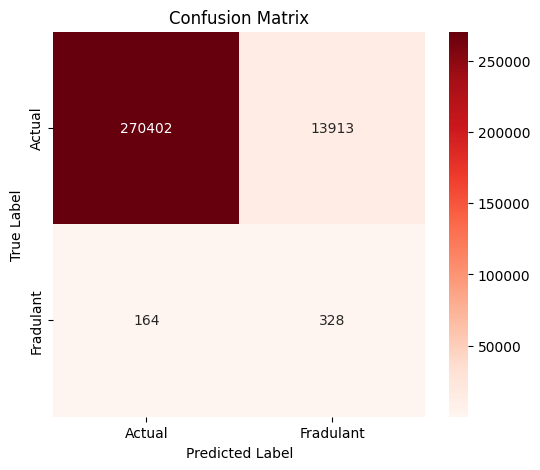

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Actual', 'Fradulant'], yticklabels=['Actual', 'Fradulant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The Autoencoder model demonstrated a Recall of 0.67, successfully identifying 67% of fraudulent transactions. However, its Precision was very low at 0.02, meaning it frequently misclassified normal transactions as fraudulent. This resulted in a low F1-Score of 0.04, indicating an imbalance between detecting fraud and minimizing false positives. Despite its high Accuracy of 95%, the model struggled with false positives. The AUC-ROC score of 0.81 shows some discrimination ability, but overall, the model's performance suggests a need for improvement in reducing false positives while maintaining strong fraud detection.